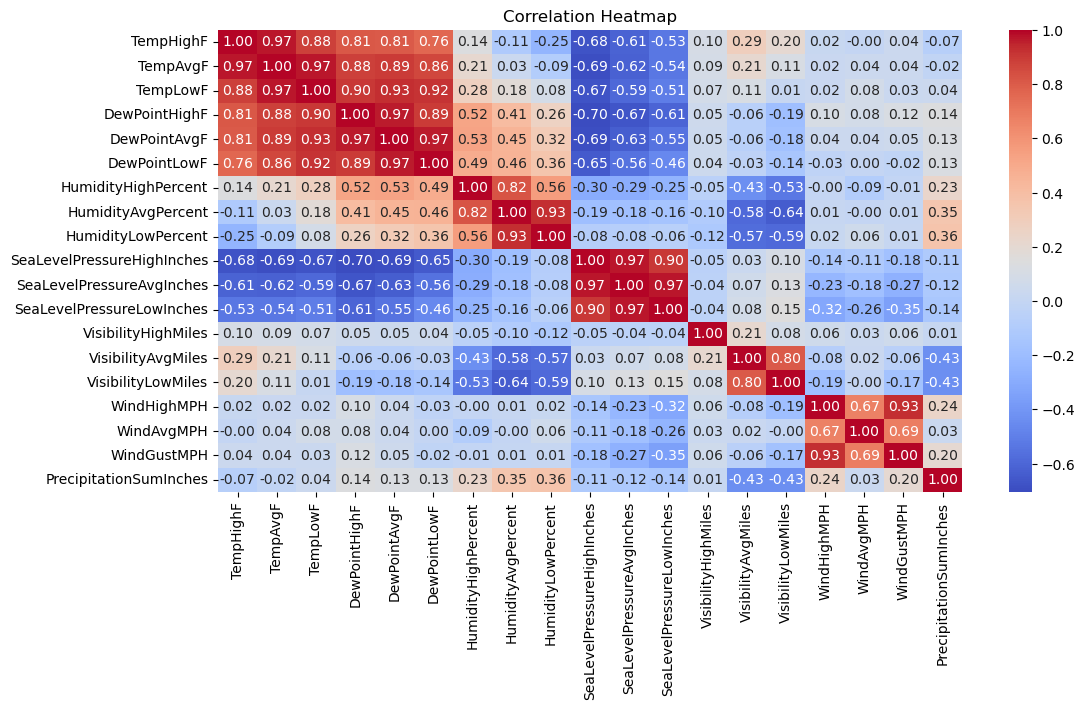

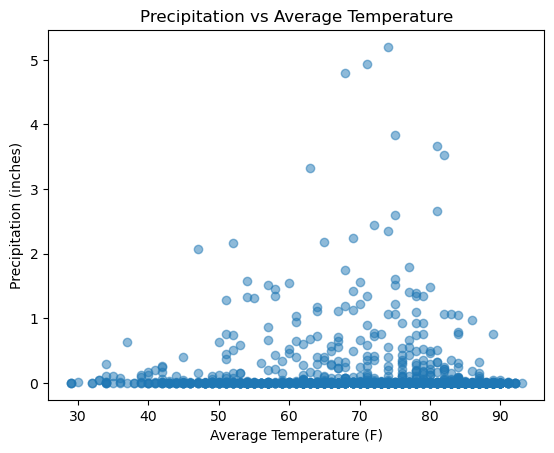

R² Score: 0.2212793788677454
Mean Squared Error: 0.06977067440792604


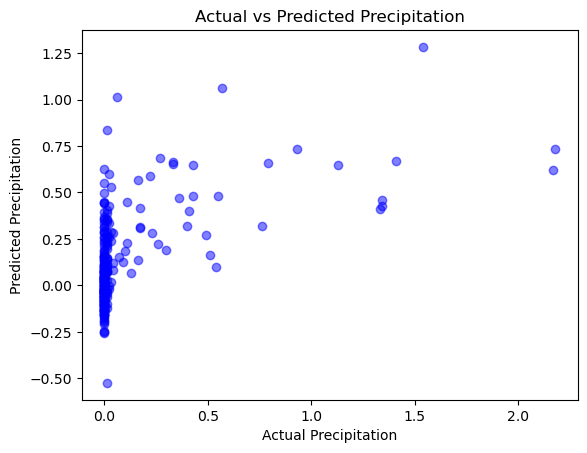

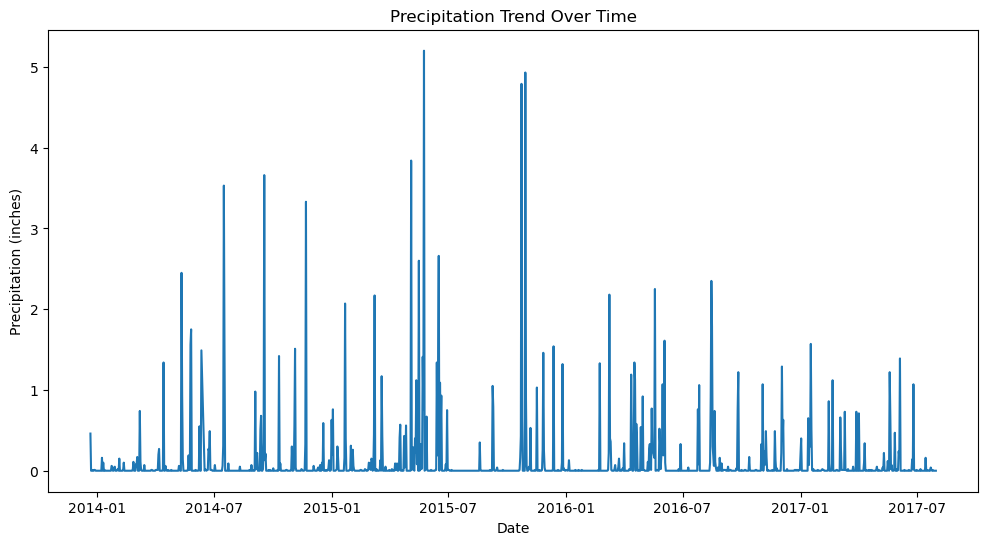

In [6]:
# ============================================
# Rainfall Prediction Project (Austin Dataset)
# ============================================

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load dataset
df = pd.read_csv("/Users/jannatrahman/your_project/rainfall_prediction/data/austin_weather.csv")

# 3. Data Cleaning & Preprocessing
# Replace "T" (trace) with 0.01, "-" with NaN
df = df.replace("T", 0.01)
df = df.replace("-", np.nan)

# Drop rows with missing values
df = df.dropna()

# Convert numeric-like columns to float
for col in df.columns:
    if col not in ["Date", "Events"]:
        df[col] = df[col].astype(float)

# Drop irrelevant columns
df = df.drop(columns=["Events"], errors="ignore")

# 4. Exploratory Data Analysis (EDA)

# Correlation heatmap (excluding non-numeric columns)
plt.figure(figsize=(12,6))
sns.heatmap(df.drop(columns=["Date", "Events"], errors="ignore").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Scatter plot: Precipitation vs Avg Temp
plt.scatter(df["TempAvgF"], df["PrecipitationSumInches"], alpha=0.5)
plt.xlabel("Average Temperature (F)")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation vs Average Temperature")
plt.show()

# 5. Features and Target
y = df["PrecipitationSumInches"]
X = df.drop(columns=["PrecipitationSumInches", "Date"], errors="ignore")

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Build Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)

# 9. Model Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 10. Visualization - Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted Precipitation")
plt.show()

# 11. Trend of Precipitation over Time
df["Date"] = pd.to_datetime(df["Date"])
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["PrecipitationSumInches"])
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Trend Over Time")
plt.show()
